In [1]:
# import glob
import sys
import pandas as pd 
import cv2
import numpy as np
import matplotlib.pyplot as plt

pathCustom = ['/Users/pannawis/Projects/01_SmartMeter/SmartPowerMeter_SW/ImageProcessing',
            '/Users/pannawis/Projects/01_SmartMeter/SmartPowerMeter_SW/SignalProcessing']
            
for ipath in pathCustom:
    if not(ipath in sys.path):
        print(f'Adding path:{ipath}')
        sys.path.append(ipath)

import wedoimage as wedoimg
import wedosignal as wedosig


Adding path:/Users/pannawis/Projects/01_SmartMeter/SmartPowerMeter_SW/ImageProcessing
Adding path:/Users/pannawis/Projects/01_SmartMeter/SmartPowerMeter_SW/SignalProcessing


In [2]:

folderImg = '/Users/pannawis/Projects/01_SmartMeter/SmartPowerMeter_SW/images/BoxMeter/BoxMeter_GoodBad/Mitsu_15A/Good'

print('Listing file...')
listImg_abs, listFil_folder, listImg_name = wedoimg.findFile(folderImg,'*.jpg',0)
nImgs = len(listImg_name)
# writeImg = int(input('write image ?\n>'))
writeImg =1

print(f'nImgs:{nImgs}')



Listing file...
nImgs:81


1_IMG_20210730_172009.jpg
analying 1/81...


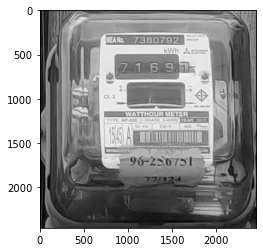

name:2_IMG_20210722_135604.jpg


In [3]:

iImg = 20
print(f'{listImg_name[iImg]}')
pathImg = listImg_abs[iImg]

countImg = -1
# for pathImg in listImg_abs[0]:

countImg = countImg + 1
print(f'analying {countImg+1}/{nImgs}...')
nameImg = listImg_name[countImg]
nameImgWithoutExtend = nameImg.split('.')[0]

boxMeter_grey = cv2.imread(pathImg,0)
h_box, w_box = boxMeter_grey.shape

wedoimg.imshowCV(boxMeter_grey)

print(f'name:{nameImg}')



# Edge from blur

In [145]:

areaBox = w_box * h_box
kernelSize_blur=3
# -- filter image
# clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(10,10))
# boxMeter_shaded = clahe.apply(boxMeter_grey)

# boxMeter_shaded = cv2.GaussianBlur(boxMeter_grey, (kernelSize_blur,kernelSize_blur), 0)
hCutStart = int(0 * h_box)
hCutEnd = int(0.6 * h_box)
boxMeter_grey = boxMeter_grey[hCutStart:hCutEnd,:]
boxMeter_blur = cv2.blur(boxMeter_grey,(kernelSize_blur,kernelSize_blur))

TH_min = 20
TH_max = 100
boxMeter_edges = cv2.Canny(boxMeter_blur,TH_min,TH_max)

TH_min = 100
TH_max = 200
boxMeter_edges2 = cv2.Canny(boxMeter_blur,TH_min,TH_max)

TH_min = 50
TH_max = 200
boxMeter_edges3 = cv2.Canny(boxMeter_blur,TH_min,TH_max)

TH_min = 20
TH_max = 200
boxMeter_edges4 = cv2.Canny(boxMeter_blur,TH_min,TH_max)

# boxMeter_crop = boxMeter[hCutStart:hCutEnd,:,:]

imgRow1 = cv2.hconcat([boxMeter_edges,boxMeter_edges2])
imgRow2 = cv2.hconcat([boxMeter_edges3,boxMeter_edges4])

imgSubplot = cv2.vconcat([imgRow1,imgRow2])

plt.figure(1)
wedoimg.imshowCV(imgSubplot)

# Edge from shade and blur

In [146]:
kernelSize_blur = 3
kernelSize_shade = 3
# -- filter image
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(10,10))
boxMeter_shaded = clahe.apply(boxMeter_grey)

# boxMeter_shaded = cv2.GaussianBlur(boxMeter_grey, (kernelSize_blur,kernelSize_blur), 0)
hCutStart = int(0 * h_box)
hCutEnd = int(0.6 * h_box)
boxMeter_grey = boxMeter_grey[hCutStart:hCutEnd,:]
boxMeter_blur = cv2.blur(boxMeter_shaded,(kernelSize_blur,kernelSize_blur))

TH_min = 20
TH_max = 200
boxMeter_edges = cv2.Canny(boxMeter_blur,TH_min,TH_max)

TH_min = 50
TH_max = 200
boxMeter_edges2 = cv2.Canny(boxMeter_blur,TH_min,TH_max)

TH_min = 100
TH_max = 200
boxMeter_edges3 = cv2.Canny(boxMeter_blur,TH_min,TH_max)

TH_min = 20
TH_max = 150
boxMeter_edges4 = cv2.Canny(boxMeter_blur,TH_min,TH_max)

# boxMeter_crop = boxMeter[hCutStart:hCutEnd,:,:]

imgRow1 = cv2.hconcat([boxMeter_edges,boxMeter_edges2])
imgRow2 = cv2.hconcat([boxMeter_edges3,boxMeter_edges4])

imgSubplot = cv2.vconcat([imgRow1,imgRow2])

plt.figure(2)
wedoimg.imshowCV(imgSubplot)

# Edge and dilate

In [157]:
kernelSize_blur = 3
kernelSize_shade = 3
# -- filter image
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(10,10))
boxMeter_shaded = clahe.apply(boxMeter_grey)

# boxMeter_shaded = cv2.GaussianBlur(boxMeter_grey, (kernelSize_blur,kernelSize_blur), 0)
hCutStart = int(0 * h_box)
hCutEnd = int(0.6 * h_box)
boxMeter_grey = boxMeter_grey[hCutStart:hCutEnd,:]
boxMeter_blur = cv2.blur(boxMeter_shaded,(kernelSize_blur,kernelSize_blur))

kernel_dil = np.ones((3,1),np.uint8)
# kernel_dil = np.array([[0,1,0],[0,0,0],[0,1,0]],dtype='uint8')

TH_min = 20
TH_max = 70
boxMeter_edges = cv2.Canny(boxMeter_blur,TH_min,TH_max)
boxMeter_edges = cv2.dilate(boxMeter_edges,kernel_dil)

TH_min = 50
TH_max = 100
boxMeter_edges2 = cv2.Canny(boxMeter_blur,TH_min,TH_max)
boxMeter_edges2 = cv2.dilate(boxMeter_edges2,kernel_dil)

TH_min = 100
TH_max = 150
boxMeter_edges3 = cv2.Canny(boxMeter_blur,TH_min,TH_max)
boxMeter_edges3 = cv2.dilate(boxMeter_edges3,kernel_dil)

TH_min = 20
TH_max = 200
boxMeter_edges4 = cv2.Canny(boxMeter_blur,TH_min,TH_max)
boxMeter_edges4 = cv2.dilate(boxMeter_edges4,kernel_dil)

# boxMeter_crop = boxMeter[hCutStart:hCutEnd,:,:]

imgRow1 = cv2.hconcat([boxMeter_edges,boxMeter_edges2])
imgRow2 = cv2.hconcat([boxMeter_edges3,boxMeter_edges4])

imgSubplot = cv2.vconcat([imgRow1,imgRow2])

plt.figure('Dilate')
wedoimg.imshowCV(imgSubplot)

# Edge erode

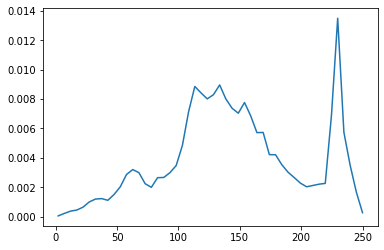

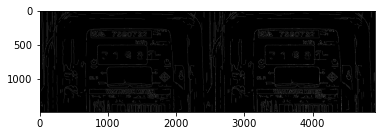

In [5]:
kernelSize_blur = 3
kernelSize_shade = 3

# -- filter image
# clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(10,10))
# boxMeter_shaded = clahe.apply(boxMeter_grey)
# boxMeter_shaded = cv2.GaussianBlur(boxMeter_grey, (kernelSize_blur,kernelSize_blur), 0)
hCutStart = int(0 * h_box)
hCutEnd = int(0.6 * h_box)

boxMeter_grey = boxMeter_grey[hCutStart:hCutEnd,:]
boxMeter_blur = cv2.blur(boxMeter_grey,(kernelSize_blur,kernelSize_blur))

plt.figure('Histrogram')
wedoimg.plotHist(boxMeter_grey,50,'pdf')

TH_min = 20
TH_max = 80
boxMeter_edges = cv2.Canny(boxMeter_blur,TH_min,TH_max)

def fillPointInEdge(img_edge):

    kernel_all = []
    kernel = np.array([[0,0,1,0,0],
                        [0,0,0,0,0],
                        [0,0,0,0,0],
                        [0,0,1,0,0],
                        [0,0,1,0,0] ], dtype='uint8')
    kernel_all.append(kernel)

    kernel = np.array([[0,1,0],
                        [0,0,0],
                        [0,1,0]], dtype='uint8')
    kernel_all.append(kernel)

    kernel = np.array([[0,0,0,0,0],
                        [0,0,0,0,0],
                        [1,0,0,1,1],
                        [0,0,0,0,0],
                        [0,0,0,0,0]], dtype='uint8')
    kernel_all.append(kernel)

    kernel = np.array([[0,0,0,0,0],
                        [0,0,0,0,0],
                        [1,0,0,1,0],
                        [0,0,0,0,0],
                        [0,0,0,0,0]], dtype='uint8')
    kernel_all.append(kernel)

    kernel = np.array([[0,0,0],
                        [1,0,1],
                        [0,0,0]], dtype='uint8')
    kernel_all.append(kernel)

    kernel = np.array([[0,0,1],
                        [0,0,0],
                        [1,0,0]], dtype='uint8')
    kernel_all.append(kernel)

    kernel = np.array([[1,0,0],
                        [0,0,0],
                        [0,0,1]], dtype='uint8')
    kernel_all.append(kernel)

    for i in range(len(kernel_all)):
        img_edge_e = cv2.erode(img_edge,kernel_all[i])

        if i == 0:
            img_edge_fix = img_edge + img_edge_e
        else:
            img_edge_fix = img_edge_fix + img_edge_e

    return img_edge_fix
    
boxFix = fillPointInEdge(boxMeter_edges)

imgRow1 = cv2.hconcat([boxMeter_edges, boxFix])

# boxFix = boxMeter_edges + boxMeter_edges_e
# imgRow2 = cv2.hconcat([boxFix,boxFix])

# imgSubplot = cv2.vconcat([imgRow1,imgRow2])

plt.figure('Erode')
# wedoimg.imshowCV(imgSubplot)
wedoimg.imshowCV(imgRow1)

In [149]:
kernel_dil.shape

(3, 3)

In [150]:
kernel_dil = np.ones((5,1),np.uint8)
# kernel_dil = np.array([[1,1],[1,0]])
kernel_dil

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)